In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
import seaborn as sb
from sklearn.preprocessing import LabelEncoder
 
%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [10]:
df_10_10inst = pd.read_csv('C:/PSL_KNN/data_10_frames_10_instances_removed.csv')

df_10_10inst['classes'] = df_10_10inst['videoname'].apply(lambda x: x.split('_')[0])
x_10_10inst = df_10_10inst.groupby('videoname').agg({'coordinate':lambda x: list(x)})
print(pd.unique(df_10_10inst['videoname']))

['aprender_18' 'aprender_27' 'aprender_35' 'aprender_7' 'bien_174'
 'bien_269' 'comer_146' 'comer_164' 'comer_484' 'comer_489' 'comer_743'
 'comer_779' 'comer_86' 'cómo_12' 'cómo_387' 'cómo_90' 'decir_101'
 'decir_276' 'decir_528' 'decir_789' 'dentro_369' 'dentro_457'
 'dentro_692' 'dentro_73' 'ese_100' 'ese_385' 'ese_608' 'ese_638'
 'ese_642' 'ese_697' 'fuerte_153' 'pensar_339' 'pensar_66' 'pensar_761'
 'pensar_771' 'tú_277' 'tú_639' 'tú_778']


In [11]:
temp_10_10inst = pd.DataFrame(x_10_10inst['coordinate'].tolist())
temp_10_10inst.head()

,0,1,2,3,4,5,6,7,8,9,...,1490,1491,1492,1493,1494,1495,1496,1497,1498,1499
0,0.514383,0.548351,0.566327,0.582206,0.492199,0.473182,0.458070,0.605817,0.432215,0.548546,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.503314,0.525787,0.540517,0.552647,0.479308,0.461066,0.442991,0.578205,0.415670,0.533213,...,0.218056,0.229558,0.271873,0.260261,0.248606,0.257307,0.300118,0.284696,0.269780,0.271916
2,0.469856,0.492260,0.508573,0.525647,0.448011,0.437482,0.425903,0.561330,0.415927,0.513131,...,0.541281,0.547010,0.554929,0.565804,0.574465,0.582370,0.572662,0.582474,0.591038,0.599251
3,0.516629,0.533556,0.545480,0.558149,0.498532,0.482805,0.466799,0.570888,0.430847,0.537545,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
4,0.503843,0.535313,0.549920,0.566584,0.500478,0.490255,0.481394,0.610536,0.490198,0.532962,...,0.640371,0.635449,0.655707,0.660179,0.657015,0.651047,0.665254,0.672792,0.671988,0.666939


In [12]:
temp_10_10inst.insert(0,"instance",['aprender_18', 'aprender_27', 'aprender_35', 'aprender_7', 'bien_174',
 'bien_269', 'comer_146', 'comer_164', 'comer_484', 'comer_489', 'comer_743',
 'comer_779', 'comer_86', 'cómo_12', 'cómo_387', 'cómo_90', 'decir_101',
 'decir_276', 'decir_528', 'decir_789', 'dentro_369', 'dentro_457',
 'dentro_692', 'dentro_73', 'ese_100', 'ese_385', 'ese_608', 'ese_638',
 'ese_642', 'ese_697', 'fuerte_153', 'pensar_339', 'pensar_66', 'pensar_761',
 'pensar_771', 'tú_277', 'tú_639', 'tú_778'


],True)


temp_10_10inst['classes'] = temp_10_10inst['instance'].apply(lambda x: x.split('_')[0])

temp_10_10inst.head()

,instance,0,1,2,3,4,5,6,7,8,...,1491,1492,1493,1494,1495,1496,1497,1498,1499,classes
0,aprender_18,0.514383,0.548351,0.566327,0.582206,0.492199,0.473182,0.458070,0.605817,0.432215,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,aprender
1,aprender_27,0.503314,0.525787,0.540517,0.552647,0.479308,0.461066,0.442991,0.578205,0.415670,...,0.229558,0.271873,0.260261,0.248606,0.257307,0.300118,0.284696,0.269780,0.271916,aprender
2,aprender_35,0.469856,0.492260,0.508573,0.525647,0.448011,0.437482,0.425903,0.561330,0.415927,...,0.547010,0.554929,0.565804,0.574465,0.582370,0.572662,0.582474,0.591038,0.599251,aprender
3,aprender_7,0.516629,0.533556,0.545480,0.558149,0.498532,0.482805,0.466799,0.570888,0.430847,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,aprender
4,bien_174,0.503843,0.535313,0.549920,0.566584,0.500478,0.490255,0.481394,0.610536,0.490198,...,0.635449,0.655707,0.660179,0.657015,0.651047,0.665254,0.672792,0.671988,0.666939,bien


In [13]:
 # Number of instances
temp_10_10inst['instance'].nunique()

38

In [14]:
# Number of classes
temp_10_10inst['classes'].nunique()

10

In [15]:
dataset_10_10inst = temp_10_10inst.iloc[:,1:1503]
dataset_10_10inst.head()

,0,1,2,3,4,5,6,7,8,9,...,1491,1492,1493,1494,1495,1496,1497,1498,1499,classes
0,0.514383,0.548351,0.566327,0.582206,0.492199,0.473182,0.458070,0.605817,0.432215,0.548546,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,aprender
1,0.503314,0.525787,0.540517,0.552647,0.479308,0.461066,0.442991,0.578205,0.415670,0.533213,...,0.229558,0.271873,0.260261,0.248606,0.257307,0.300118,0.284696,0.269780,0.271916,aprender
2,0.469856,0.492260,0.508573,0.525647,0.448011,0.437482,0.425903,0.561330,0.415927,0.513131,...,0.547010,0.554929,0.565804,0.574465,0.582370,0.572662,0.582474,0.591038,0.599251,aprender
3,0.516629,0.533556,0.545480,0.558149,0.498532,0.482805,0.466799,0.570888,0.430847,0.537545,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,aprender
4,0.503843,0.535313,0.549920,0.566584,0.500478,0.490255,0.481394,0.610536,0.490198,0.532962,...,0.635449,0.655707,0.660179,0.657015,0.651047,0.665254,0.672792,0.671988,0.666939,bien


In [16]:
print(pd.unique(dataset_10_10inst['classes']))

X_10_10inst_v2= dataset_10_10inst.iloc[:,:-1].values
y_10_10inst_v2=  dataset_10_10inst.iloc[:,-1].values


Labelencoder_Y = LabelEncoder()
y_10_10inst_v2= Labelencoder_Y.fit_transform(y_10_10inst_v2)
y_10_10inst_v2

X_train_10_10inst_v2, X_test_10_10inst_v2, y_train_10_10inst_v2, y_test_10_10inst_v2 = train_test_split(X_10_10inst_v2, y_10_10inst_v2, test_size = 0.25, random_state=0)
scaler = MinMaxScaler()
X_train_10_10inst_v2 = scaler.fit_transform(X_train_10_10inst_v2)
X_test_10_10inst_v2 = scaler.transform(X_test_10_10inst_v2)

['aprender' 'bien' 'comer' 'cómo' 'decir' 'dentro' 'ese' 'fuerte' 'pensar'
 'tú']


([<matplotlib.axis.XTick at 0x205cbdd4550>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

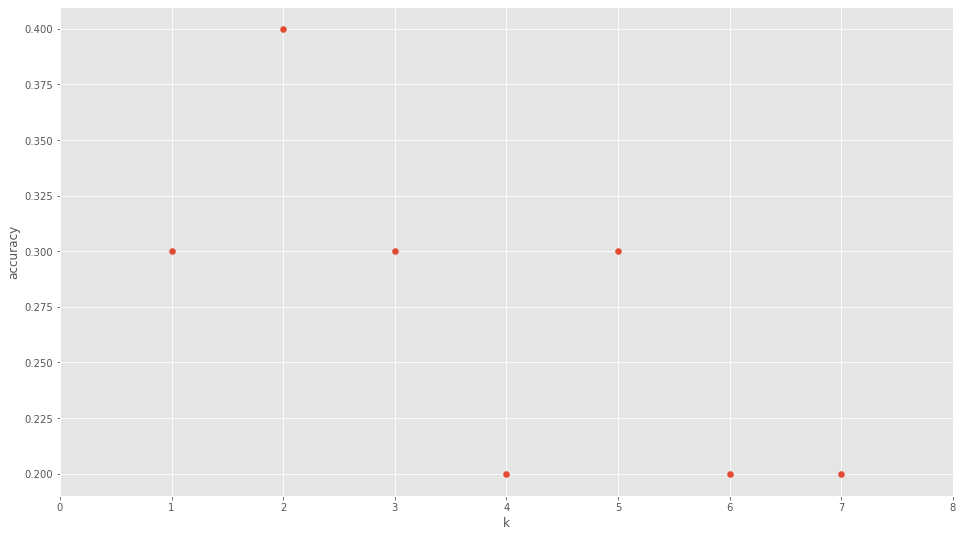

In [17]:
k_range_10_10inst_v2 = range(1, 8)
scores_10_10inst_v2 = []
for k in k_range_10_10inst_v2:
    knn_10_10inst_v2 = KNeighborsClassifier(n_neighbors = k)
    knn_10_10inst_v2.fit(X_train_10_10inst_v2, y_train_10_10inst_v2)
    scores_10_10inst_v2.append(knn_10_10inst_v2.score(X_test_10_10inst_v2, y_test_10_10inst_v2))
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range_10_10inst_v2, scores_10_10inst_v2)
plt.xticks([0,1,2,3,4,5,6,7,8])

# With k = 1

Accuracy of K-NN classifier on training set: 1.00
Accuracy of K-NN classifier on test set: 0.30


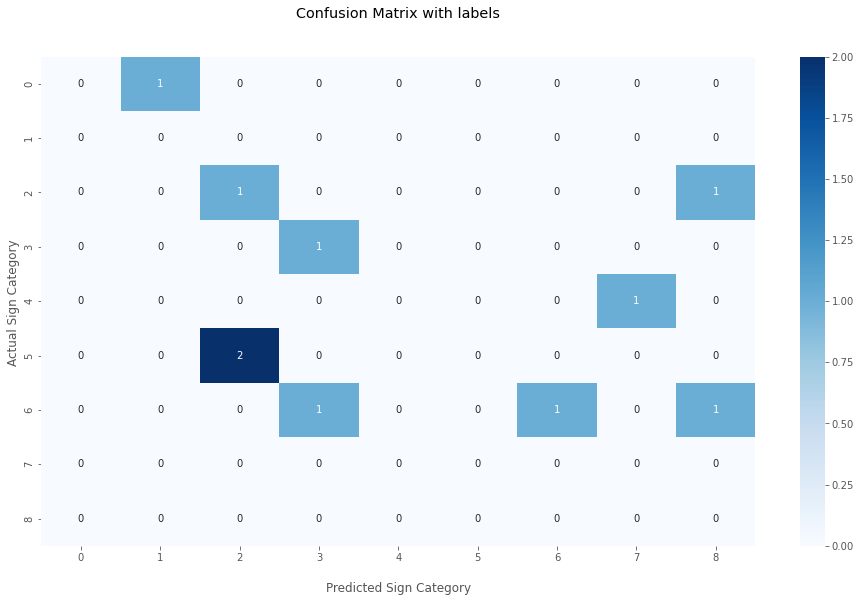

In [18]:
n_neighbors_10_10inst_v2 = 1
 
knn_10_10inst_v2 = KNeighborsClassifier(n_neighbors_10_10inst_v2)
knn_10_10inst_v2.fit(X_train_10_10inst_v2, y_train_10_10inst_v2)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn_10_10inst_v2.score(X_train_10_10inst_v2, y_train_10_10inst_v2)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn_10_10inst_v2.score(X_test_10_10inst_v2, y_test_10_10inst_v2)))
	 
import pandas as pd

pred_10_10inst_v2 = knn_10_10inst_v2.predict(X_test_10_10inst_v2)
cf_matrix_10_10inst_v2 = confusion_matrix(y_test_10_10inst_v2, pred_10_10inst_v2)

import seaborn as sns
import matplotlib.pyplot as plt

ax_10_10inst_v2 = sns.heatmap(cf_matrix_10_10inst_v2, annot=True, cmap='Blues')

ax_10_10inst_v2.set_title('Confusion Matrix with labels\n\n');
ax_10_10inst_v2.set_xlabel('\nPredicted Sign Category')
ax_10_10inst_v2.set_ylabel('Actual Sign Category ');

## Display the visualization of the Confusion Matrix.
plt.show()

# With k = 2

Accuracy of K-NN classifier on training set: 0.54
Accuracy of K-NN classifier on test set: 0.40


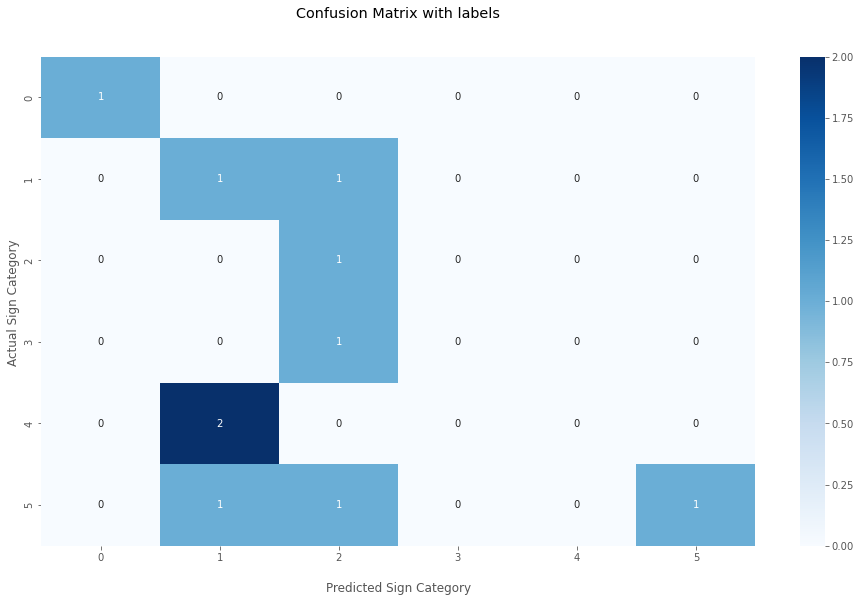

In [19]:
n_neighbors_10_10inst_v2 = 2
 
knn_10_10inst_v2 = KNeighborsClassifier(n_neighbors_10_10inst_v2)
knn_10_10inst_v2.fit(X_train_10_10inst_v2, y_train_10_10inst_v2)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn_10_10inst_v2.score(X_train_10_10inst_v2, y_train_10_10inst_v2)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn_10_10inst_v2.score(X_test_10_10inst_v2, y_test_10_10inst_v2)))
	 
import pandas as pd

pred_10_10inst_v2 = knn_10_10inst_v2.predict(X_test_10_10inst_v2)
cf_matrix_10_10inst_v2 = confusion_matrix(y_test_10_10inst_v2, pred_10_10inst_v2)

import seaborn as sns
import matplotlib.pyplot as plt

ax_10_10inst_v2 = sns.heatmap(cf_matrix_10_10inst_v2, annot=True, cmap='Blues')

ax_10_10inst_v2.set_title('Confusion Matrix with labels\n\n');
ax_10_10inst_v2.set_xlabel('\nPredicted Sign Category')
ax_10_10inst_v2.set_ylabel('Actual Sign Category ');

## Display the visualization of the Confusion Matrix.
plt.show()

# With k = 3

Accuracy of K-NN classifier on training set: 0.36
Accuracy of K-NN classifier on test set: 0.30


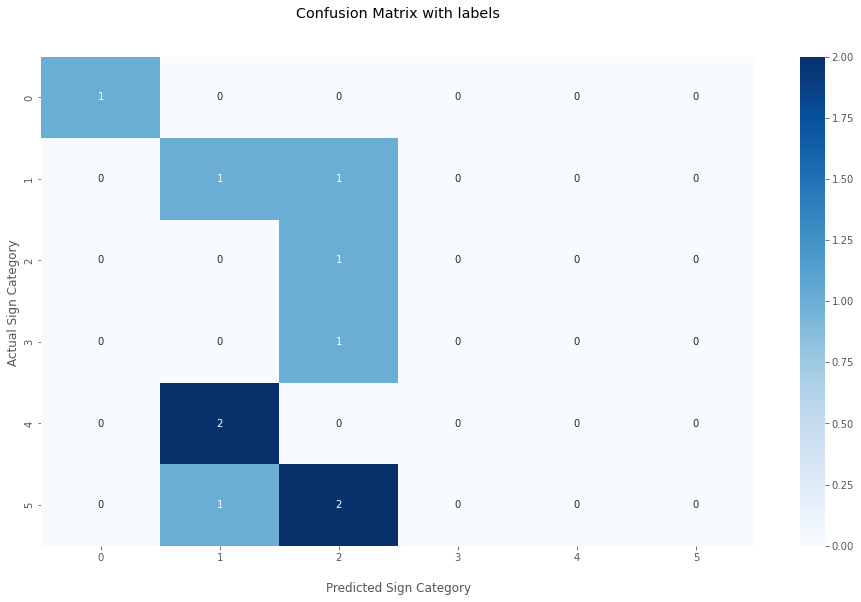

In [20]:
n_neighbors_10_10inst_v2 = 3
 
knn_10_10inst_v2 = KNeighborsClassifier(n_neighbors_10_10inst_v2)
knn_10_10inst_v2.fit(X_train_10_10inst_v2, y_train_10_10inst_v2)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn_10_10inst_v2.score(X_train_10_10inst_v2, y_train_10_10inst_v2)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn_10_10inst_v2.score(X_test_10_10inst_v2, y_test_10_10inst_v2)))
	 
import pandas as pd

pred_10_10inst_v2 = knn_10_10inst_v2.predict(X_test_10_10inst_v2)
cf_matrix_10_10inst_v2 = confusion_matrix(y_test_10_10inst_v2, pred_10_10inst_v2)

import seaborn as sns
import matplotlib.pyplot as plt

ax_10_10inst_v2 = sns.heatmap(cf_matrix_10_10inst_v2, annot=True, cmap='Blues')

ax_10_10inst_v2.set_title('Confusion Matrix with labels\n\n');
ax_10_10inst_v2.set_xlabel('\nPredicted Sign Category')
ax_10_10inst_v2.set_ylabel('Actual Sign Category ');

## Display the visualization of the Confusion Matrix.
plt.show()

# With k = 5

Accuracy of K-NN classifier on training set: 0.25
Accuracy of K-NN classifier on test set: 0.30


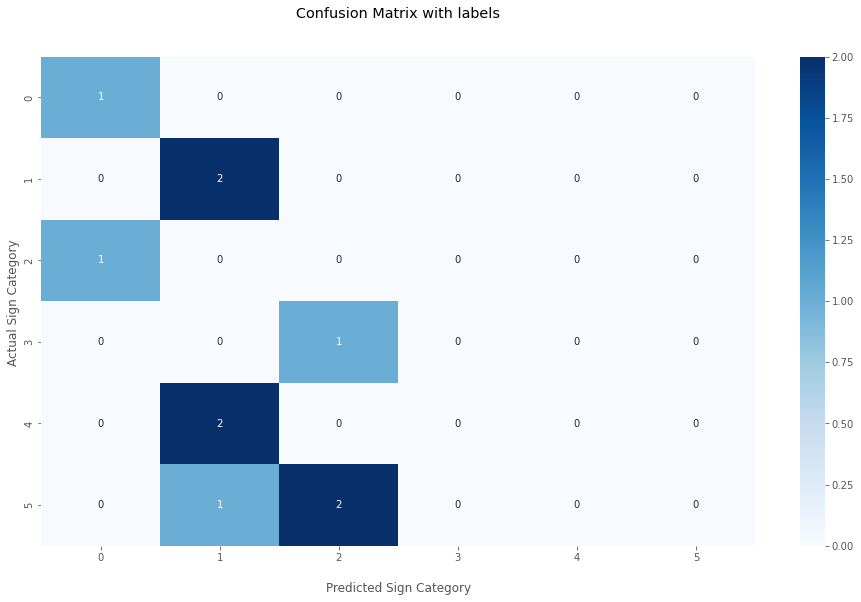

In [21]:
n_neighbors_10_10inst_v2 = 5
 
knn_10_10inst_v2 = KNeighborsClassifier(n_neighbors_10_10inst_v2)
knn_10_10inst_v2.fit(X_train_10_10inst_v2, y_train_10_10inst_v2)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn_10_10inst_v2.score(X_train_10_10inst_v2, y_train_10_10inst_v2)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn_10_10inst_v2.score(X_test_10_10inst_v2, y_test_10_10inst_v2)))
	 
import pandas as pd

pred_10_10inst_v2 = knn_10_10inst_v2.predict(X_test_10_10inst_v2)
cf_matrix_10_10inst_v2 = confusion_matrix(y_test_10_10inst_v2, pred_10_10inst_v2)

import seaborn as sns
import matplotlib.pyplot as plt

ax_10_10inst_v2 = sns.heatmap(cf_matrix_10_10inst_v2, annot=True, cmap='Blues')

ax_10_10inst_v2.set_title('Confusion Matrix with labels\n\n');
ax_10_10inst_v2.set_xlabel('\nPredicted Sign Category')
ax_10_10inst_v2.set_ylabel('Actual Sign Category ');

## Display the visualization of the Confusion Matrix.
plt.show()